##  Import Libraries & Process Data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset_training = pd.read_csv('AAPL_Training.csv')
dataset_training.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,79.167145,80.182854,79.142860,80.145714,67.919533,55771100
1,2014-01-02,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
2,2014-01-03,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
3,2014-01-06,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
4,2014-01-07,77.760002,77.994286,76.845711,77.148575,65.379593,79302300


In [5]:
training_data = dataset_training.iloc[:, 1:2].values
training_data

array([[ 79.167145],
       [ 79.382858],
       [ 78.980003],
       ...,
       [148.300003],
       [155.839996],
       [157.5     ]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)

training_data_scaled 

array([[0.0526565 ],
       [0.05400437],
       [0.05148716],
       ...,
       [0.48462887],
       [0.53174205],
       [0.54211448]])

## Create Data Time Stamps & Rehape the Data

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train



array([[[0.0526565 ],
        [0.05400437],
        [0.05148716],
        ...,
        [0.0413468 ],
        [0.04582785],
        [0.04002572]],

       [[0.05400437],
        [0.05148716],
        [0.03773165],
        ...,
        [0.04582785],
        [0.04002572],
        [0.03850823]],

       [[0.05148716],
        [0.03773165],
        [0.04386406],
        ...,
        [0.04002572],
        [0.03850823],
        [0.03932056]],

       ...,

       [[0.96257182],
        [0.98231691],
        [0.97794302],
        ...,
        [0.56023491],
        [0.53811549],
        [0.48369155]],

       [[0.98231691],
        [0.97794302],
        [0.99543867],
        ...,
        [0.53811549],
        [0.48369155],
        [0.48462887]],

       [[0.97794302],
        [0.99543867],
        [1.        ],
        ...,
        [0.48369155],
        [0.48462887],
        [0.53174205]]])

## Create & Compile an RNN Architecure 

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [10]:
model = Sequential()

In [11]:
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))


# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))


# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))


# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100))


# Adding the output layer
model.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)



Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0198
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0022
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 4/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0019
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 9/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0011
Epoch 10/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0015
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017
Epoch 12/100
1198/1198 [==

## Prepare the Test Data , Concatenate Test &  Train Datasets


In [13]:
dataset_testing = pd.read_csv("AAPL_Test.csv")
actual_stock_price = dataset_testing.iloc[:, 1:2].values
actual_stock_price

array([[158.529999],
       [154.889999],
       [143.979996],
       [144.529999],
       [148.699997],
       [149.559998],
       [151.289993],
       [152.5     ],
       [152.880005],
       [150.850006],
       [150.270004],
       [153.080002],
       [154.199997],
       [157.5     ],
       [156.410004],
       [154.149994],
       [154.110001],
       [155.479996],
       [155.789993],
       [156.25    ],
       [163.25    ]])

In [14]:
total_data = pd.concat((dataset_training['Open'], dataset_testing['Open']), axis = 0)
inputs = total_data[len(total_data) - len(dataset_testing) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualize the Results


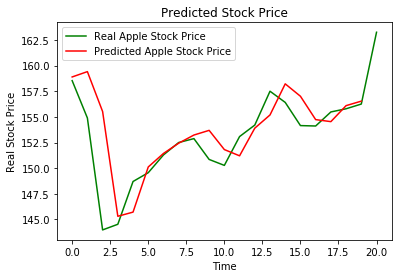

In [15]:
# Visualising the results
plt.plot(actual_stock_price, color = 'green', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Apple Stock Price')
plt.title('Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()